### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf
from keras.datasets import fashion_mnist,cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import *
import keras

#### Collect Fashion mnist data from tf.keras.datasets 

In [3]:
(Xtrain,Ytrain),(Xtest,Ytest)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### Change train and test labels into one-hot vectors

In [0]:
Ytrain=tf.keras.utils.to_categorical(Ytrain,num_classes=10)
Ytest=tf.keras.utils.to_categorical(Ytest,num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
model=Sequential()
Xtrain=Xtrain/255
Xtest=Xtest/255

In [0]:
Xtrain=Xtrain.reshape(60000,28,28,1)
Xtest=Xtest.reshape(10000,28,28,1)

In [8]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape


((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [9]:
model.add(Dense(200,activation='relu',input_shape=(28,28,1)))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.25))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [10]:
model.add(Flatten())
model.add(Dense(10,activation='softmax',))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28, 200)       400       
_________________________________________________________________
dense_2 (Dense)              (None, 28, 28, 100)       20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                784010    
Total params: 804,510
Trainable params: 804,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(Xtrain,Ytrain,batch_size=32,nb_epoch=10,validation_data=(Xtest, Ytest))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.4658 - acc: 0.8341 - val_loss: 0.4265 - val_acc: 0.8495
Epoch 2/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.3847 - acc: 0.8631 - val_loss: 0.4079 - val_acc: 0.8527
Epoch 3/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.3616 - acc: 0.8698 - val_loss: 0.3981 - val_acc: 0.8564
Epoch 4/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.3433 - acc: 0.8747 - val_loss: 0.3801 - val_acc: 0.8642
Epoch 5/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.3305 - acc: 0.8811 - val_loss: 0.3994 - val_acc: 0.8590
Epoch 6/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.3190 - acc: 0.8849 - val_loss: 0.3837 - val_acc: 0.8621
Epoch 7/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.3103 - acc: 0.8877 - val_loss: 0.

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator


### **Load CIFAR10 dataset**

In [13]:
(Xtrain2,Ytrain2),(Xtest2,Ytest2)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [14]:
Xtrain2.shape,Ytrain2.shape,Xtest2.shape,Ytest2.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
Ytrain2=tf.keras.utils.to_categorical(Ytrain2,num_classes=10)
Ytest2=tf.keras.utils.to_categorical(Ytest2,num_classes=10)
Xtrain2=Xtrain2/255
Xtest2=Xtest2/255

In [16]:
Xtrain2.shape,Ytrain2.shape,Xtest2.shape,Ytrain2.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (50000, 10))

In [22]:
model2=Sequential()
# First conv layer
model2.add(Convolution2D(32,3,3,input_shape=(32,32,3)))
model2.add(Activation('relu'))
#second conv layer
model2.add(Convolution2D(32,3,3,))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))

#fully connected layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))


model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stops=keras.callbacks.EarlyStopping(patience=5)

call_backs=[early_stops]

model2.fit(Xtrain2,Ytrain2,batch_size=32,nb_epoch=15,validation_data=(Xtest2, Ytest2), callbacks=call_backs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 12s 244us/step - loss: 1.3858 - acc: 0.5045 - val_loss: 1.1109 - val_acc: 0.6030
Epoch 2/15
50000/50000 [==============================] - 9s 180us/step - loss: 1.0412 - acc: 0.6347 - val_loss: 0.9938 - val_acc: 0.6570
Epoch 3/15
50000/50000 [==============================] - 9s 183us/step - loss: 0.9052 - acc: 0.6818 - val_loss: 0.9489 - val_acc: 0.6681
Epoch 4/15
50000/50000 [==============================] - 9s 177us/step - loss: 0.8073 - acc: 0.7157 - val_loss: 0.9011 - val_acc: 0.6916
Epoch 5/15
50000/50000 [==============================] - 9s 177us/step - loss: 0.7257 - acc: 0.7440 - val_loss: 0.9001 - val_acc: 0.6944
Epoch 6/15
50000/50000 [==============================] - 9s 184us/step - loss: 0.6543 - acc: 0.7698 - val_loss: 0.8944 - val_acc: 0.6937
Epoch 7/15
50000/50000 [==============================] - 9s 183us/step - loss: 0.5842 - acc: 0.7921 - val_loss: 0.9405 -

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
datagen.fit(Xtrain2)

### **Prepare/fit the generator.**

In [24]:
model2.fit_generator(datagen.flow(Xtrain2,Ytrain2,batch_size=32),
                     samples_per_epoch=Xtrain2.shape[0],
                     nb_epoch=20
                     ,
                     validation_data=(Xtest2, Ytest2))

Epoch 1/20
   9/1562 [..............................] - ETA: 23s - loss: 2.3706 - acc: 0.4444

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=1562, epochs=20)`
  """


1562/1562 [==============================] - 24s 15ms/step - loss: 1.3757 - acc: 0.5140 - val_loss: 1.0967 - val_acc: 0.6268
Epoch 2/20
1562/1562 [==============================] - 24s 16ms/step - loss: 1.2485 - acc: 0.5564 - val_loss: 1.0653 - val_acc: 0.6379
Epoch 3/20
1562/1562 [==============================] - 24s 16ms/step - loss: 1.1978 - acc: 0.5788 - val_loss: 0.9902 - val_acc: 0.6547
Epoch 4/20
1562/1562 [==============================] - 25s 16ms/step - loss: 1.1699 - acc: 0.5864 - val_loss: 1.1054 - val_acc: 0.6365
Epoch 5/20
1562/1562 [==============================] - 25s 16ms/step - loss: 1.1430 - acc: 0.5950 - val_loss: 0.9504 - val_acc: 0.6700
Epoch 6/20
1562/1562 [==============================] - 25s 16ms/step - loss: 1.1188 - acc: 0.6045 - val_loss: 0.9828 - val_acc: 0.6700
Epoch 7/20
1562/1562 [==============================] - 25s 16ms/step - loss: 1.0979 - acc: 0.6137 - val_loss: 1.0260 - val_acc: 0.6536
Epoch 8/20
1562/1562 [==============================] - 24s

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

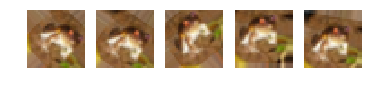

In [25]:
from matplotlib import pyplot as plt
gen = datagen.flow(Xtrain2[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()